# Chaos deterministyczny w prostym odwzorowaniu czyli dlaczego nie można przewidzieć pogody ?

https://youtu.be/8mXcFxK7PAM

O czym będziemy rozmawiać:

1. Co to jest iteracja i odwzorowanie logistyczne?  
2. Co to jest punkt stały i bifurkacja?  
3. Co to jest chaos ?    
4. Czy kolejnośc wykonywania działań ma znaczenie.
5. Czemu nie można przewdzieć pogody ani innych złożonych zdarzeń?   


## Świat stochastyczny vs. deterministyczny. 

Zdefiniujmy sobie funkcję daną wzorem  
# _x(t+1)=a$\cdot$x(t)$\cdot$(1-x(t))_   
gdzie _t_ jest parametrem dyskretnym który możemy utożsamić z czasem, _a_ jest pewnym parametrem rzeczywistym.


Co to jest iteracja ?  
Jest to operacja wykonywana określoną ilośc razy (np. _k-krotnie_) aż do wystąpienia warunku stopu. 
Czyli: __CZARNA SKRZYNKA__ !  

Co to oznacza w naszym przypadku ?   

Ustalmy a=0.5.
Iteracja 0:
 Wybieramy argument oraz ilość iteracji np. k=2, x0=x(0)=2
Iteracja 1.  
    x(1)=a$\cdot$x(0)$\cdot$(1-x(0))  
    x(1)=0.5$\cdot$2$\cdot$(1-2)=-1  
Iteracja 2.  
    x(2)=a$\cdot$x(1)$\cdot$(1-x(1))  
    x(2)=0.5$\cdot$(-1)$\cdot$(2)  
    x(2)=-1    Itd.  
Uogólniając możemy zapisać:  
    x(t+1)=a$\cdot$x(t)$\cdot$[1-x(t)]
 
Równanie to ma interpretację biologiczną jeżeli założymy, że kolejne chwile czasowe 1,...,t,t+1,...,n to kolejne pokolenia składnik liniowy jest odpowiedizalny za rozrodczość składnik kwadratowy za hamowanie przyrostu.   


In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


    
def logistic_print(x0,a,i,func,prt=1):
    x_list=[x0]
    x=x0
    for k in range(i):
        
        x=func(a,x)
        x_list.append(x)
        if i<70:
            if i%10!=0:
                if prt:
                    print('Numer iteracji %s, Wartość iteracji %s' %  (k,round(x,10)))
        else:
            if prt:
                print('Numer iteracji %s, Wartość iteracji %s' %  (k,round(x,10)))
    return x_list
  
    
def logistic(a, x):
    return a * x * (1 - x)

def logistic_non_bracket(a,x):
    return a*x-a*x*x
    
    
    
def plot_system(x0, a, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(a, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(a, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$a={a:.2f}, \, s_0={x0:.2f}$")

def plot_logistic(value,style='ro'):
    fig = plt.figure(figsize=(10,6))
    ax=plt.axes()
    # x0=0.1,a=2.5, i=10
    plt.plot(value,style,markersize=4)
    ax.set_xlabel("Iteration number")
    ax.set_ylabel("Value of s(t)")
    ax.set_title(f"$a={a:.2f}, \, s_0={x0:.2f}$")
    #plt.show()
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6),
                                   sharey=True)
    ax1.set_xlabel("Value of s(t)")
    ax1.set_ylabel("Value of s(t+1)")
    plot_system(x0, a, i, ax=ax1)

## Iterujemy

In [10]:
x0=0.1
a=2.5
i=10

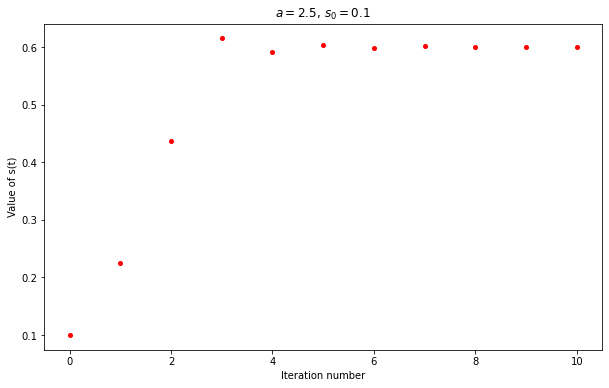

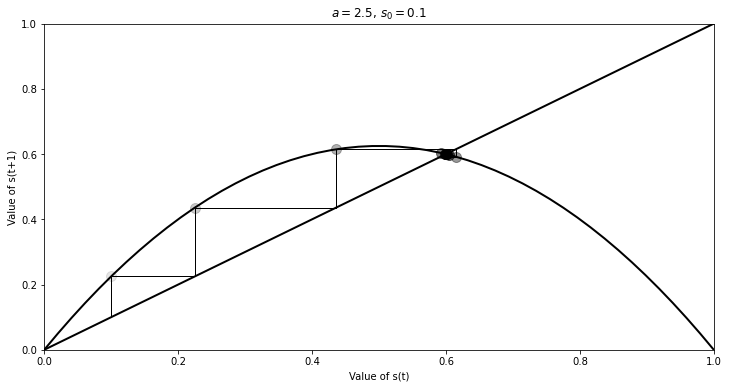

In [11]:
value=logistic_print(x0,a,i,logistic)

plot_logistic(value)

Zanim zbadamy zachowanie tego odwzorowania zdefiniujmy sobie punkt stały.  
__Definicja 1.__  
Punktem stałym równania nazywamy taki punkt $\tilde{x}$ który spełnia:
_f( $\tilde{x}$)= $\tilde{x}$_  
__Ćwiczenie 1.__   
a)Znaleźć punkty stałe odwzorowania logistycznego.  
 x=a*x(1-x)  
 1=a*(1-x)  
 x=a/1-a  

## Szukamy chaosu

Wróćmy teraz do naszego odzorowania logistycznego. Co się stanie jeżeli przyjmiemy następujące parametry 
a=1.1,x0=0.4,i=100 ?

In [12]:
x0=0.4
a=1.1
i=100

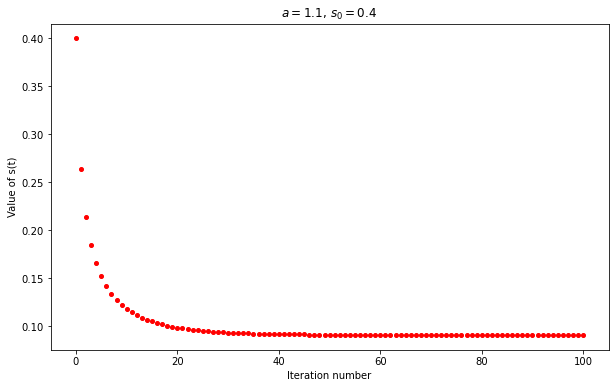

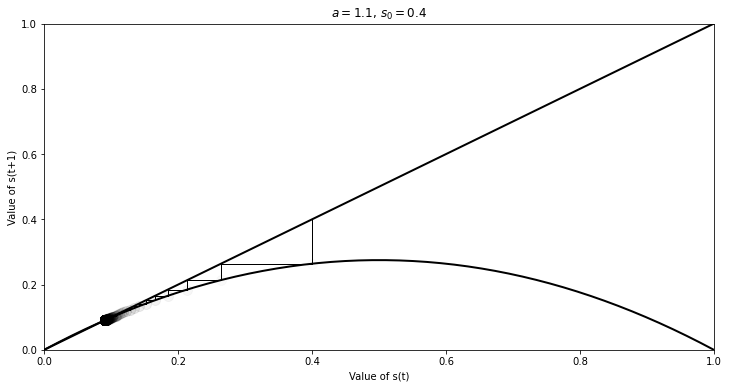

In [13]:
value=logistic_print(x0,a,i,logistic,prt=0)

plot_logistic(value)



In [123]:
print(1-(1/1.1))

0.09090909090909094


Wnioski: NIC CIEKAWEGO :(  
Wypróbujemy teraz małą zmianę parametru x0=0.4, a=1.10001, i=100 oraz  x0=0.40001, a=1.1, i=100

In [17]:
x0=0.4
a=1.10001
i=100

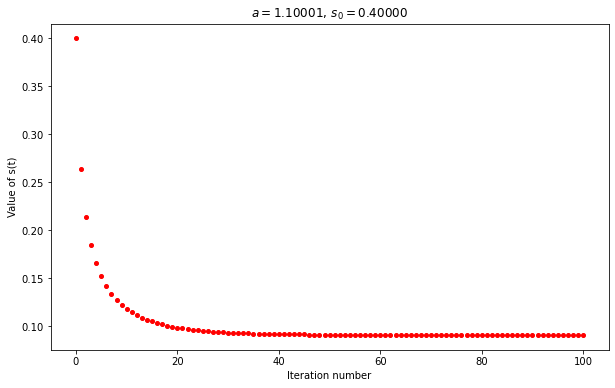

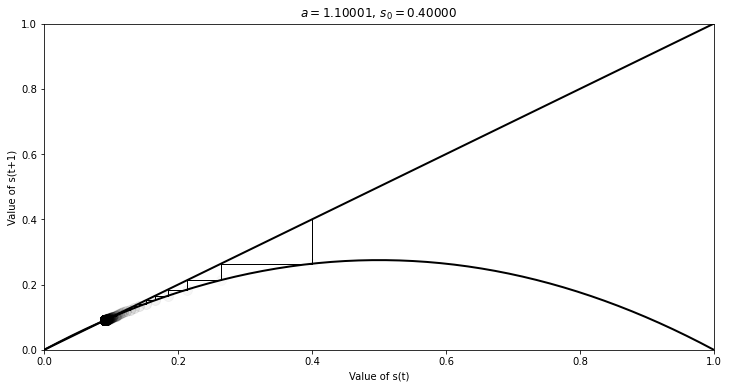

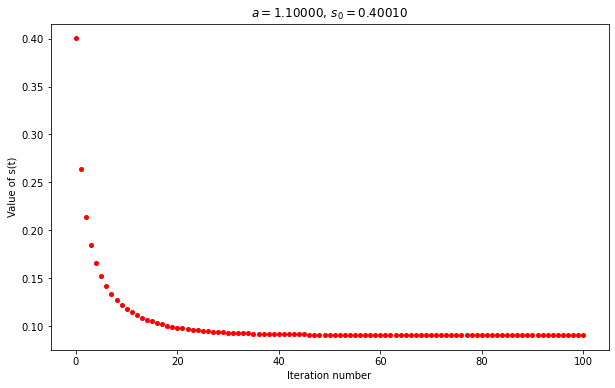

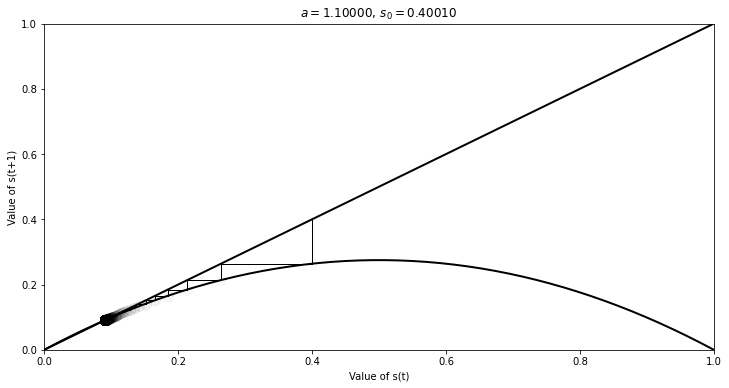

In [18]:
value=logistic_print(x0,a,i,logistic,prt=0)
plot_logistic(value)

x0=0.4001
a=1.1
i=100

value=logistic_print(x0,a,i,logistic,prt=0)
plot_logistic(value)

## Poszukajmy ciekawych zachowań !


In [19]:
x0=0.4
a=3.4
i=100

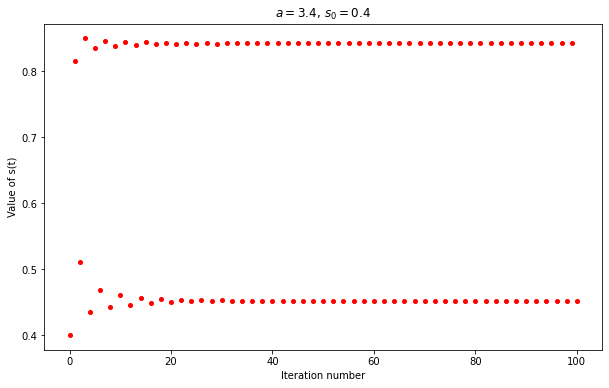

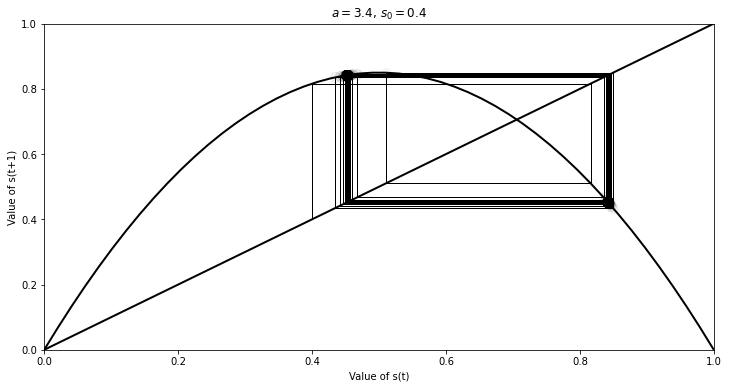

In [27]:
value=logistic_print(x0,a,i,logistic,prt=0)
plot_logistic(value)

In [29]:
x0=0.4
a=3.47
i=100

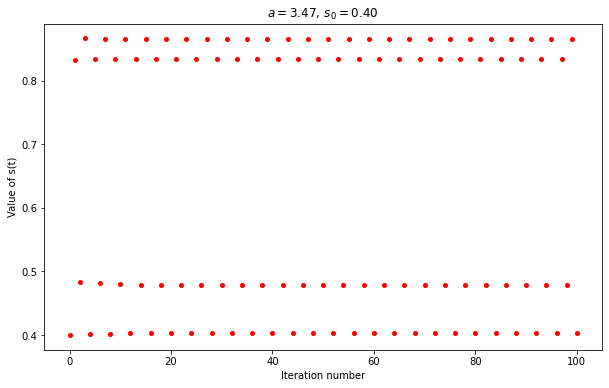

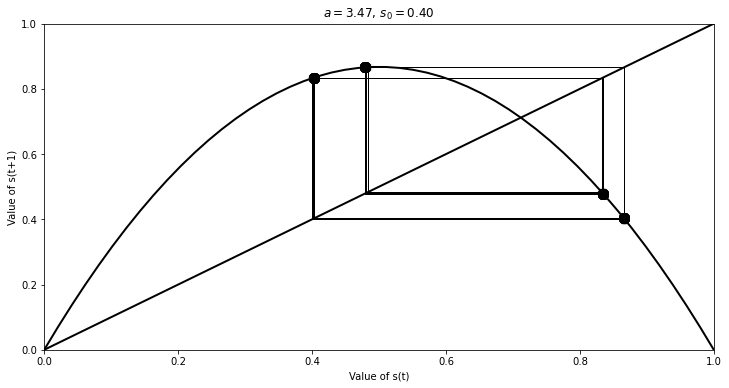

In [30]:
value=logistic_print(x0,a,i,logistic,prt=0)
plot_logistic(value)

### Co się stało ?

 Jak zmienił się okres ?

Co się stanie jeżeli dalej będziemy zmieniać parametr a ? 

In [31]:
x0=0.4
a=3.6
i=200

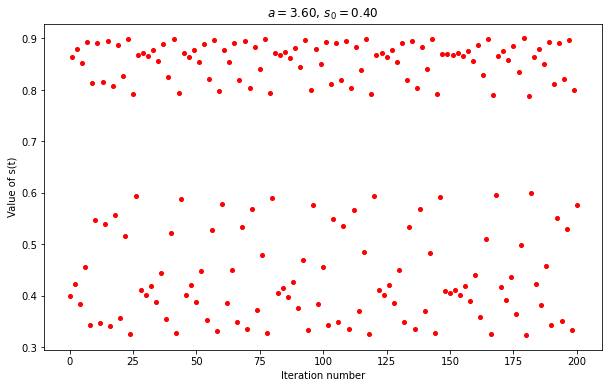

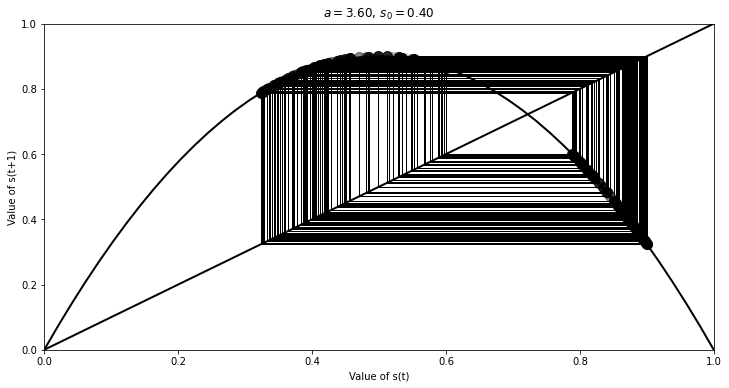

In [32]:
value=logistic_print(x0,a,i,logistic,prt=0)
plot_logistic(value) 
                               

## Mała zmiana parametru a

In [140]:
x0=0.4
a=3.60001
i=200

#vs

x0=0.4
a=3.6
i=200


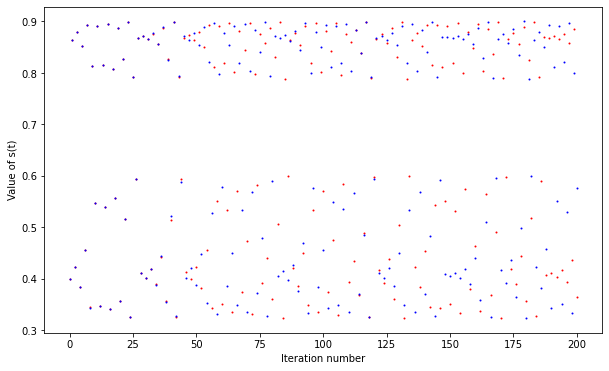

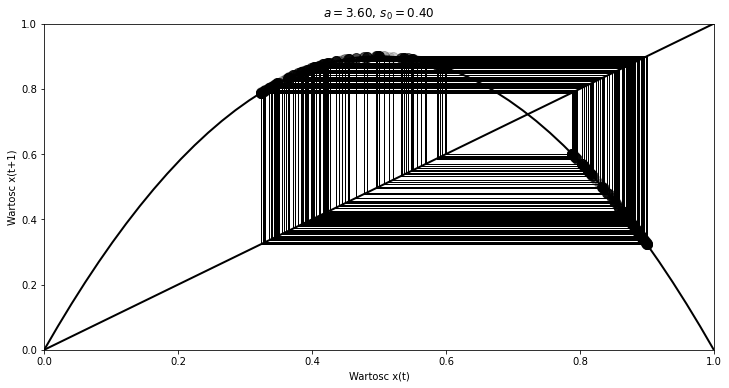

In [35]:
fig = plt.figure(figsize=(10,6))
ax=plt.axes()


plt.plot(logistic_print(0.4,3.60001,200,logistic,prt=0),'ro',markersize=1)

plt.plot(logistic_print(0.4,3.6,200,logistic,prt=0),'bo',markersize=1)

ax.set_xlabel("Iteration number")
ax.set_ylabel("Value of s(t)")
#ax.set_title(f"$a={a:.2f}, \, s_0={x0:.2f}$")

plt.show()
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6),
                               sharey=True)
ax1.set_xlabel("Wartosc x(t)")
ax1.set_ylabel("Wartosc x(t+1)")
plot_system(0.4,3.600001,200, ax=ax1)

``` Mała zmiana parametru powoduje poważne zmiany wartości iteracji   
Chaos !```

## Otwieramy nawias

In [ ]:
x0=0.4
a=3.6
i=200

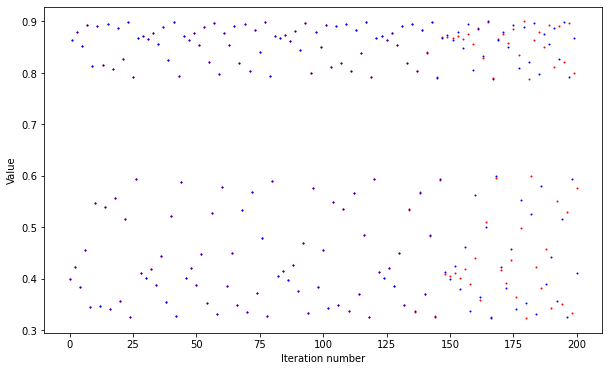

In [36]:

fig = plt.figure(figsize=(10,6))
ax=plt.axes()
plt.plot(logistic_print(x0,a,i,logistic,prt=0),'ro',markersize=1)
plt.plot(logistic_print(x0,a,i,logistic_non_bracket,prt=0),'bo',markersize=1)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Value")
plt.show()

``` Dokładnośc komputera nie pozwala otrzymać identycznych wyników```

**Ćwiczenie 4.**
Jakiego rzędu będzie wielomnian powstający z odwzorowania logistycznego po 6 iteracjach ? 
    Odp=1237

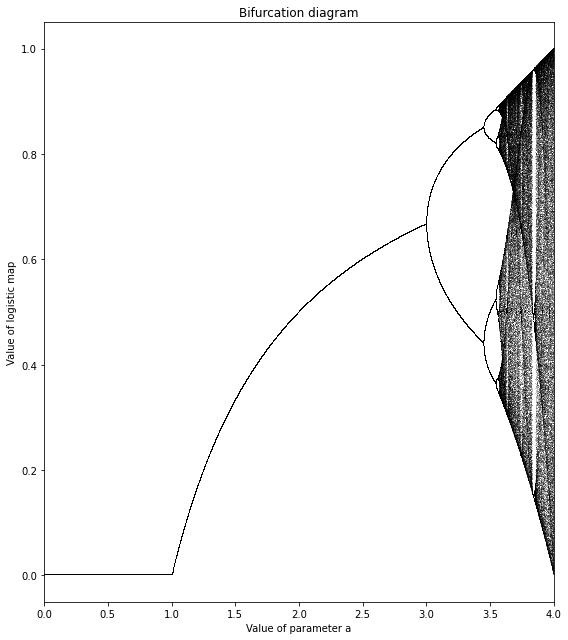

In [39]:
iterations = 1000
last = 100
n = 10000
start=0
stop=4
a = np.linspace(start, stop, n)
x = 1e-5 * np.ones(n)
fig, ax1 = plt.subplots(1, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(a, x)
    # We compute the partial sum of the
    # Lyapunov exponent.

    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(a, x, ',k', alpha=.25)
ax1.set_xlim(start, stop)
ax1.set_title("Bifurcation diagram")
ax1.set_xlabel("Value of parameter a")
ax1.set_ylabel("Value of logistic map")
plt.tight_layout()

## Precyzja komputera

In [147]:
x0=0.4
a=3.58
i=200

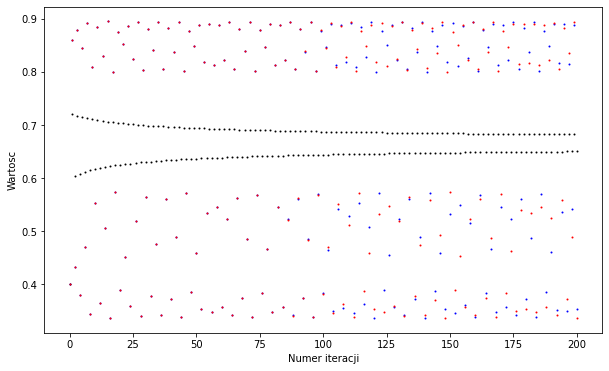

In [148]:
import numpy as np
fig = plt.figure(figsize=(10,6))
ax=plt.axes()

plt.plot(logistic_print(x0,int(a),i,logistic,prt=0),'ko',markersize=1)
plt.plot(logistic_print(x0,np.single(a),i,logistic,prt=0),'bo',markersize=1)
plt.plot(logistic_print(np.double(x0),np.double(a),i,logistic,prt=0),'ro',markersize=1)
ax.set_xlabel("Numer iteracji")
ax.set_ylabel("Wartosc")
plt.show()

# Dlaczego nie można przewidzieć pogody ? 

``` 
Prosty model Lorentza: 
x(t+1)=x(t)+10*[y(t)-x(t)]*e  
y(t+1)=y(t)+[28x(t)-y(t)-x(t)z(t)]*e  
z(t+1)=z(t)+[-8/3*z(t)+x(t)*y(t)]*e```

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


def show_lorenz(dt,stepCnt,delta):
    # Wartosci poczatkowe
    xs = np.empty((stepCnt + 1,))
    ys = np.empty((stepCnt + 1,))
    zs = np.empty((stepCnt + 1,))

    xs1 = np.empty((stepCnt + 1,))
    ys1 = np.empty((stepCnt + 1,))
    zs1 = np.empty((stepCnt + 1,))


    xs[0], ys[0], zs[0] = (0,1,1.05)
    xs1[0], ys1[0], zs1[0] = (0,1+delta,1.05)

    for i in range(stepCnt):

        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        x_dot1, y_dot1, z_dot1 = lorenz(xs1[i], ys1[i], zs1[i])
        xs1[i + 1] = xs1[i] + (x_dot1 * dt)
        ys1[i + 1] = ys1[i] + (y_dot1 * dt)
        zs1[i + 1] = zs1[i] + (z_dot1 * dt)










    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')

    ax.plot(xs, ys, zs, lw=0.5,color='b')
    ax.plot(xs1, ys1, zs1, lw=0.5,color='r')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Atraktor Lorentza")



    plt.show()

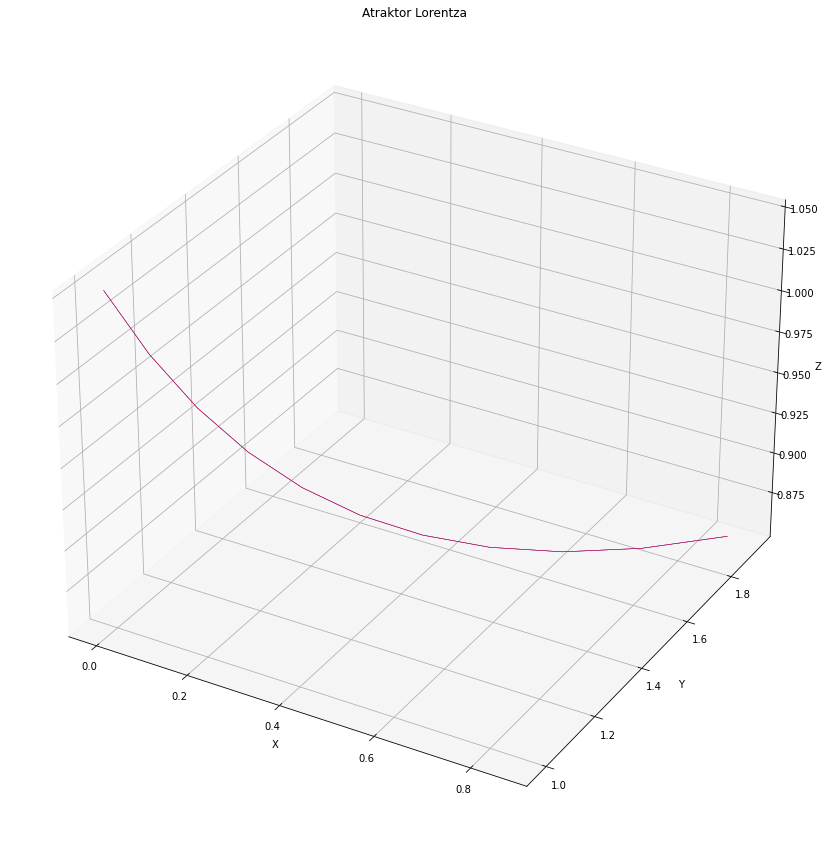

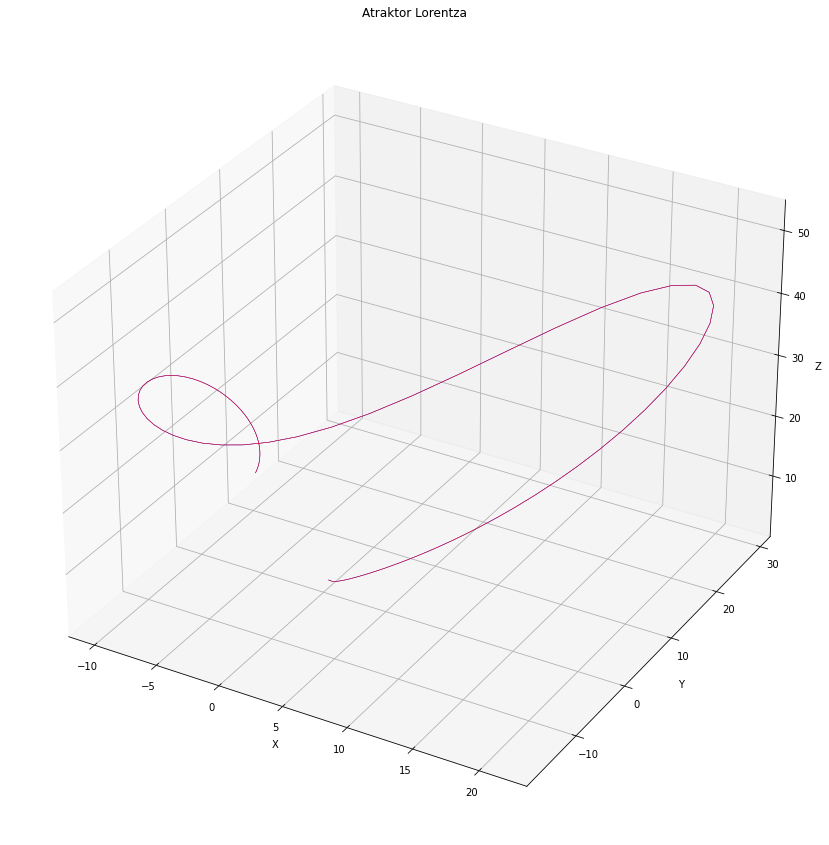

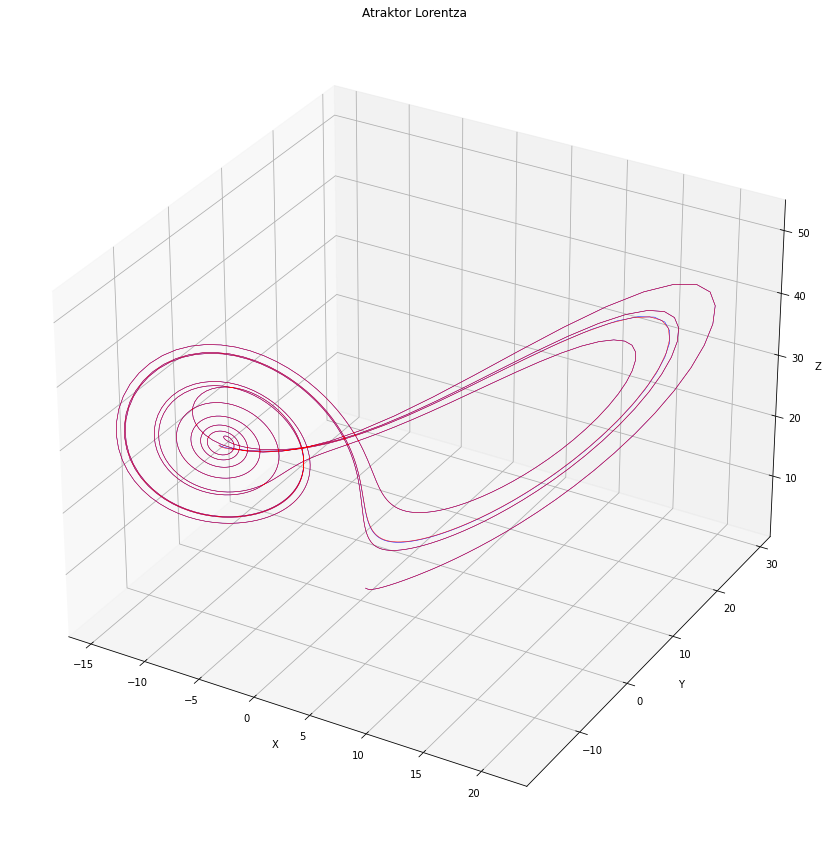

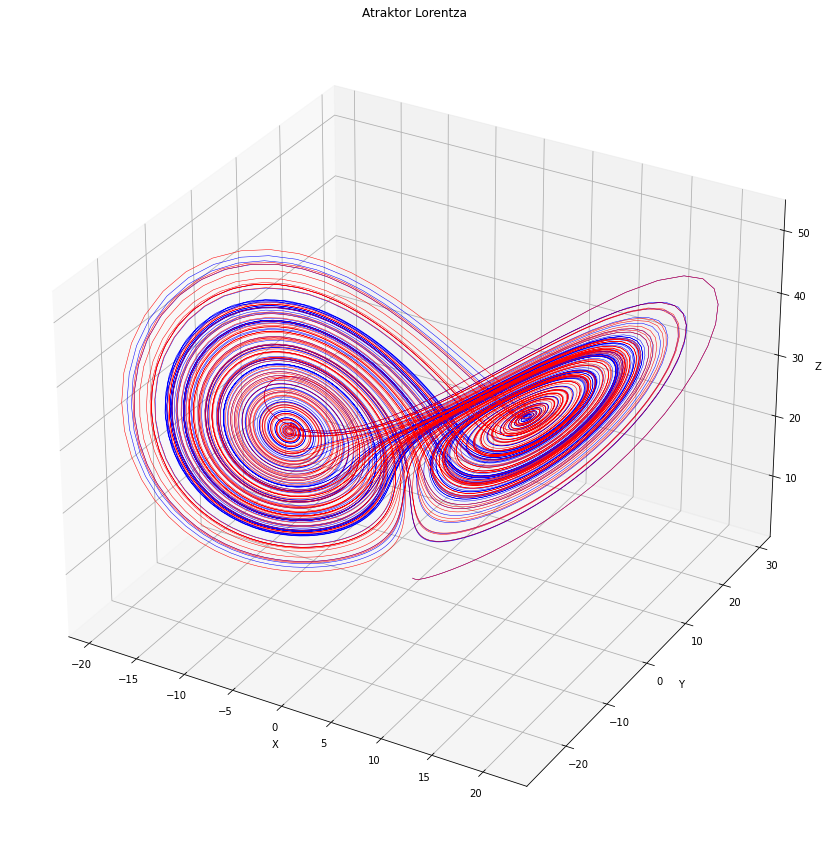

In [150]:
dt = 0.01
stepCnt = [10,100,1000,10000]
for step in stepCnt:
    show_lorenz(dt,step,delta=0.00001)